## Chap 8 - Sampling Methods and the Central Limit Theorem

In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### 8.2

<div class="alert alert-info">
**SIMPLE RANDOM SAMPLE** - A sample selected so that each item or person in the population has the same chance of being included.

**SYSTEMATIC RANDOM SAMPLE** - A random starting point is selected, and then every kth member of the population is selected.

**STRATIFIED RANDOM SAMPLE** - A population is divided into subgroups, called strata, and a sample is randomly selected from each stratum.

**CLUSTER SAMPLE** - A population is divided into clusters using naturally occurring geographic or other boundaries. Then, clusters are randomly selected and a sample is collected by randomly selecting from each cluster.
</div>
<hr>

<u>Self Review 8.1</u>

a) PRICE, MARY LYNETTE, DETLEY, BRIAN HANS, MOLTER, KRISTI MARIE

b) Use $(x\mod 46) -1$ to pick the numbers, and then pick the students. This results in picking 42, 39, 9

c) Calculate $(59\mod 46) -1=12$ and pick student no. 12

In [2]:
print((2711 % 46)-1)
print((8182 % 46)-1)
print((79866 % 46)-1)
print()
print((59 % 46)-1)

42
39
9

12


<u>Self Review 8.2</u>

Students `03`, `12`, `21`, `30`, `39`

In [3]:
x = 4
l = []
for i in range(45//9):
    l.append(x + 9*i-1)
print(l)

[3, 12, 21, 30, 39]


### 8.3

<div class="alert alert-info">
**SAMPLING ERROR** - The difference between a sample statistic and its corresponding population parameter.
</div>

### 8.4
<div class="alert alert-info">
**SAMPLING DISTRIBUTION OF THE SAMPLE MEAN** - A probability distribution of all possible sample means of a given sample size.
</div>

<u>Self Review 8.3</u>

In [4]:
x = ([('Mr. Snow', 20), ('Ms. Tolson', 22), 
       ('Mr. Kraft', 26), ('Ms. Irwin', 24),
       ('Mr. Jones', 28)])
x_df = pd.DataFrame(x, columns=['Name', 'Years'])
x_df['Years'] = x_df['Years'].astype(float)
display(x_df)

,Name,Years
0,Mr. Snow,20.0
1,Ms. Tolson,22.0
2,Mr. Kraft,26.0
3,Ms. Irwin,24.0
4,Mr. Jones,28.0


a) No. of possible samples $={5\choose 2} = \frac{5!}{2! \cdot 3!} =  \frac{120} {12} = 10$ 

b)


In [5]:
d_values = [k[0] + k[1] for k in itertools.combinations(x,2)]
s_df = pd.DataFrame(d_values, columns = ['Name1', 'Years1', 'Name2', 'Years2'])
s_df['YearsMean'] = s_df[['Years1', 'Years2']].mean(axis=1)
display(s_df)

,Name1,Years1,Name2,Years2,YearsMean
0,Mr. Snow,20,Ms. Tolson,22,21.0
1,Mr. Snow,20,Mr. Kraft,26,23.0
2,Mr. Snow,20,Ms. Irwin,24,22.0
3,Mr. Snow,20,Mr. Jones,28,24.0
4,Ms. Tolson,22,Mr. Kraft,26,24.0
5,Ms. Tolson,22,Ms. Irwin,24,23.0
6,Ms. Tolson,22,Mr. Jones,28,25.0
7,Mr. Kraft,26,Ms. Irwin,24,25.0
8,Mr. Kraft,26,Mr. Jones,28,27.0
9,Ms. Irwin,24,Mr. Jones,28,26.0


c)

In [6]:
s_mean_count = s_df.groupby(['YearsMean']).size()
print(s_mean_count)

YearsMean
21.0    1
22.0    1
23.0    2
24.0    2
25.0    2
26.0    1
27.0    1
dtype: int64


d)

In [7]:
popn_mean = x_df['Years'].mean()
print(popn_mean)
sampling_mean = s_df['YearsMean'].mean()
print(sampling_mean)

24.0
24.0


The population mean, $\mu$ and the sampling mean, $\mu_{\bar{X}}$ are the same.

e) 

In [8]:
print(x_df['Years'].var())
print(s_df['YearsMean'].var())

10.0
3.3333333333333335


The distribution of the sample mean is smaller than that of the population dispersion.

f) No.

g) 

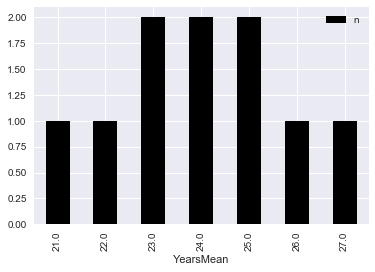

In [9]:
s_mean_count.reset_index(name='n').plot(kind='bar', x='YearsMean', 
                                          y='n', color='black')

Yes.

### 8.5

<div class="alert alert-info">
<p>**CENTRAL LIMIT THEOREM** - If all samples of a particular size are selected from any population, the sampling distribution of the sample mean is approximately a normal distribution. This approximation improves with larger samples.</p>
<p>
**STANDARD ERROR OF THE MEAN** - Standard deviation of the sampling distribution of the sample mean.</p>
</div>

<div class="alert alert-success">
**STANDARD ERROR OF THE MEAN**, 
$$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt X}$$
</div>


<u>Self Review 8.4</u>

0    5.6
1    5.0
2    6.2
3    2.8
4    6.2
5    8.4
6    5.2
7    1.6
8    4.4
9    4.6
dtype: float64


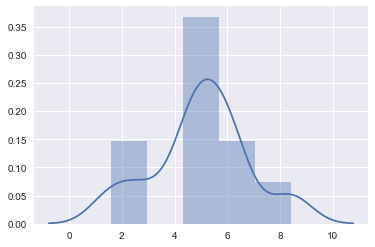

In [10]:
svc_lengths = pd.Series([11, 4, 18, 2, 1, 2, 0, 2, 2, 4, 3, 4, 1, 2, 2, 3, 3, 19, 8, 3, 7, 1, 0, 2, 7, 0, 4, 5, 1, 14, 16, 8, 9, 1, 1, 2, 5, 10, 2, 3,])
# Select 10 samples of 5 employees
svc_samples = []
for i in range(10):
    svc_samples.append(svc_lengths.sample(5))
# Mean of each sample
means = []
for spl in svc_samples:
    means.append(spl.mean())
means_series = pd.Series(means)
print(means_series)
sns.distplot(means_series)

### 8.6

<div class="alert alert-success">
**FINDING $z$-value of $\bar X$ when POPULATION STANDARD DEVIATION IS KNOWN**:

$$z = \frac{\bar X - \mu}{\frac{\sigma}{\sqrt n}}$$
</div>

<u>Self Review 8.5</u>

In [11]:
z = (31.08-31.2) / (0.4/16**0.5)
print(z)
print(sp.stats.norm.sf(abs(z)))

-1.20000000000001
0.11506967022170633


$z$-value is $-1.20$, chance of $z$-value smaller than $-1.2$ is $11.5\%$. It is unlikely that there are so many bottles underfilled. Hence, increase the amount filled in each bottle.